In previous examples I discussed release scenarios involving vapour clouds spreading over a large area, carried by the wind. In those examples the momentum of the jet of fluid was not very important relative to the ambient wind conditions and could be ignored. In this example I am looking at the opposite extreme, a release from a pressure vessel inside a building where the momentum of the jet dominates.

## The Scenario

Consider, for an example, a leak from an acetylene cylinder inside a large building, such as in a warehouse or shop. We imagine, for convenience, that the air within the building is quiescent. For the sake of an example suppose the leak is a 1/4 in. hole, similar in diameter to a typical acetylene hose, and that the operating pressure at that point is 15psig[^1] We are interested in exploring the concentration distribution as the acetylene jets into the air and mixes, with our reference concentration of interest being half the LEL of 2.5%(vol).

[^1]: From CGA G-1 2009 the safe operating pressure of an acetylene system

In [1]:
using Unitful: @u_str, ustrip

inch = ustrip(u"m", 1u"inch") # unit conversion inch->m
psi = ustrip(u"Pa", 1u"psi")  # unit conversion psi->Pa

p₂ = 14.7psi   # atmospheric pressure, Pa absolute
T₂ = 25+273.15 # ambient temperature, K

d  = 0.25inch  # diameter of the hole, m
p₁ = 15psi+p₂ # pressure of the acetylene, Pa absolute
T₁ = T₂        # the release temperature, K

298.15

We can look up some properties of acetylene in Perry's[@poling-2007]

In [2]:
# universal gas constant, J/mol/K
R = 8.31446261815324 

# ideal gas density, kg/m³
ρ(p,T;MW) = (p*MW)/(R*T)/1000

# gas viscosity correlation, Pa*s
μ(T;C) = (C[1]*T^(C[2]))/(1+(C[3]/T)+(C[4]/T^2)) 

# Properties of Acetylene
MWⱼ = 26.037 # molar mass, kg/kmol
LEL = 0.025  # Lower explosive limit, vol/vol
k   = 1.26   # ratio cp/cv at 15C
μⱼ  = μ(T₁;C=[1.2025e-6,0.4952,291.4,0])
ρ₁  = ρ(p₁,T₁;MW=MWⱼ)

# Properties of Air
MWₐ = 28.960  # molar mass, kg/kmol
ρ₂  = ρ(p₂,T₂;MW=MWₐ)

1.1840386427594014

## The Release Rate

We can model the release as a gas jet[@ccps-1999 page 29] where the gas is ideal and the expansion through the jet is an isentropic process[@ccps-1999 has a mistake in equation 2.16, the version given here is correct]

$$ G = \rho u = c_d \sqrt{ \rho_1 p_1 \left( 2 k \over k-1 \right) \left[ \left(p_2 \over p_1\right)^{2 \over k} - \left(p_2 \over p_1\right)^{k+1 \over k} \right]} $$

for non-choked flow and

$$ G = c_d \sqrt{ \rho_1 p_1 k \left( 2 \over k+1 \right)^{k+1 \over k-1} } $$

for choked flow, which occurs when

$$ \left(p_2 \over p_1 \right) \lt \left( 2 \over k+1 \right)^{k \over k-1} $$

Where *G* is the mass velocity of acetylene discharged through the hole (in kg/m²/s), *c<sub>d</sub>* is the discharge coefficient which can be assumed to be 0.61[@ccps-1999 page 30], and the rest are as defined earlier. I am assuming, here, that the hole is circular for simplicity.

In [3]:
(p₂/p₁) < (2/(k+1))^(k/(k-1)) 

true

Therefore the flow is choked and

In [4]:
c_d = 0.61

G = c_d * √(ρ₁*p₁*k*(2/(k+1))^((k+1)/(k-1)) )

267.1556913840265

The density at the orifice is reduced, through the expansion and, for an isentropic process, is related to the pressure by

$$ {\rho_o \over \rho_1} = \left( p_o \over p_1 \right)^{1 \over k} $$

Where subscript *o* indicates at the orifice. At this point, after the expansion $p_o = p_2$ and

$$ \rho_o = \rho_1 \left( p_o \over p_1 \right)^{1 \over k} $$

In [5]:
ρₒ = ρ₁*(p₂/p₁)^(1/k)

1.2307940295609565

The velocity at the orifice, i.e. after the gas has expanded, is then

$$ u_o = {G \over \rho_o} $$

In [6]:
uₒ = G/ρₒ

217.05962571115586

## Jet Behavior

To model the concentration profile I am going to assume a turbulent jet, from a circular hole, mixing with air. In this case the density of air and acetylene are similar and so a simple turbulent jet model is appropriate. If there was a significant difference in densities then a density correction would be needed, however for many applications "close" means a ratio of ambient to jet densities between[@poleshaw-2013]

$$ \frac{1}{4} \le { \rho_{a} \over \rho_{j} } \le 4 $$

Where subscript *a* indicates the ambient fluid and *j* the jet.

Circular turbulent jets expand by entraining ambient fluid, tracing out a cone defined by a jet angle $\alpha \approx 15-25^\circ$. The mixing layer penetrates into the jet forming the potential cone, inside is pure jet material and outside is mixed. After approximately 6 hole diameters the region is fully developed.[@revill-1992]

::: {#fig-jet}
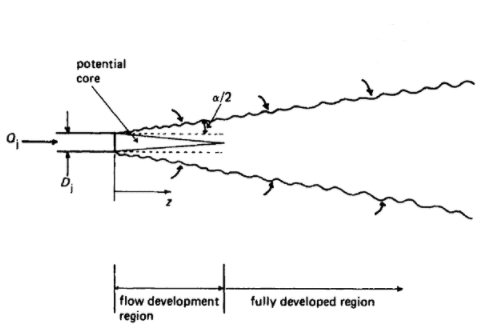

A turbulent jet expanding into a quiescent atmosphere.
:::

Empirical approximations of the velocity, and concentration, profiles are often given with respect to this jet angle or, equivalently, the slope of line (i.e. $\tan \frac{\alpha}{2}$)

Another important factor is the Reynolds number, the jet is fully turbulent when $Re \gt 2000$, where the Reynolds number is calculated with respect to the initial jet velocity and jet diameter (i.e. the hole diameter)

$$ Re = { \rho u d \over \mu } = { G d \over \mu }$$

In [7]:
0.25 < (ρ₂/ρₒ) < 4

true

In [8]:
Re = G*d/μⱼ

Re > 2000

true

The densities are within the appropriate range and the flow is fully turbulent, so the turbulent jet model requirements are satisfied.

### Velocity and Concentration distributions

There are many different empirical velocity distributions as well as velocity distributions derived from theories of turbulent mixing available in various references. Mostly of the same general type (gaussian), but parametrized slightly differently. However, in my experience, there are far fewer concentration distributions available, this is not too critical due to an interesting result in turbulent mass transfer for jets[@bird-2007 page 416]

$$ { C \over C_{max} } = \left( v_z \over v_{z,max} \right)^{Sc_t} $$

That is, at a given distance *z* away from the hole, the concentration profile is the velocity profile raised to the power $Sc_t$ -- the turbulent Schmidt number. Experimentally this is approximately 0.7. Note also that $C_{max}$ and $v_{z,max}$ are taken at the centerline. Physically this means that the concentration profile, at a given downstream distance, is wider than the velocity distribution; concentration expands more.

A similar way of capturing the same phenomenon that is often seen with empirical velocity distributions is to define a width parameter $b$ and note that the equivalent width for the concentration profile is $1.17b$[@kaye-2018] and substitute in accordingly.

In this example I am using the empirical concentration given in Lees[@lees-1996 page 15/140] for simplicity

$$ {C \over C_0 } = k_2 \left( d_h \over z \right) \left( \rho_z \over \rho_o \right)^{0.5} \exp \left( - \left( k_3 r \over z \right)^2 \right) $$

Note also the ratio of densities, the density $\rho_z$ is the density of the jet at some distance *z* and it is common to conservatively take this as $\rho_a$.

The parameters $k_2$ and $k_3$ are empirically derived for the particular jet and $k_2$ is a function of Reynolds number below $Re \lt 20000$ [@long-1963]. The conservative values suggested are *6* and *5* respectively.

In [9]:
function C(r, z; C₀=1.0, k₂=6, k₃=5, d=d, ρz=ρ₂, ρₒ=ρₒ)
    C = C₀ * k₂ * (d/z) * √(ρz/ρₒ) * exp(-(k₃*r/z)^2)
end

C (generic function with 1 method)

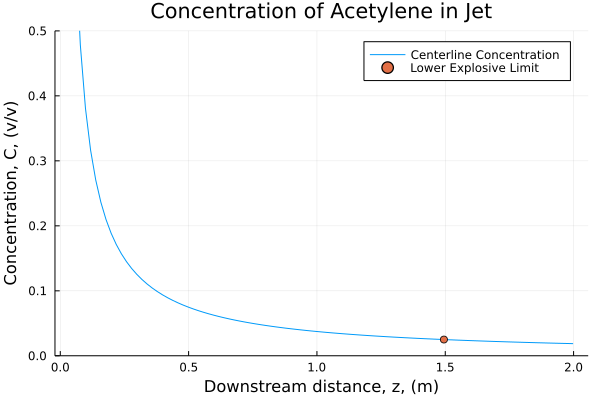

In [10]:
#| echo: false
#| label: fig-conc
#| fig-cap: "The centerline concentration of acetylene as a concentration of downstream distance."
using Plots:plot, plot!
let

using Roots: find_zero

zs = 6*d:0.02:2
Cs = C.(0, zs)

z_lel = find_zero(z -> C(0, z) - LEL, 1)

plot(zs, Cs, lab="Centerline Concentration")
plot!([z_lel], [LEL], seriestype=:scatter, lab="Lower Explosive Limit")
plot!(title="Concentration of Acetylene in Jet",
      ylabel="Concentration, C, (v/v)", ylim=(0,0.5),
      xlabel="Downstream distance, z, (m)")

end

At this point it is worth pointing out that the model of the jet is independent of the discharge rate. The concentration profile is only a function of the hole diameter and the fluid density. The velocity in the jet, and the amount of air entrained in the jet, do depend strongly on the initial discharge rate but in such a way that the concentration does not. As the jet velocity increases proportionally more air is entrained and the concentration profile remains constant.

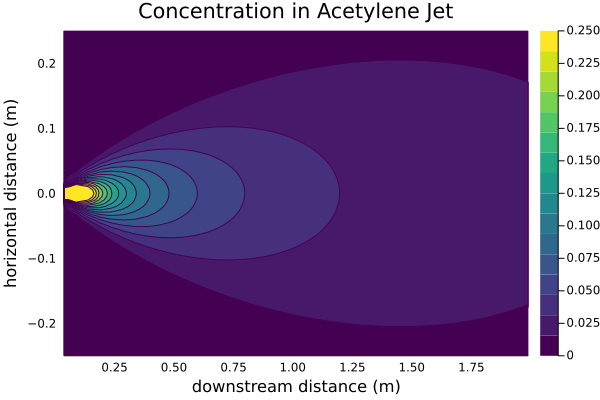

In [11]:
#| echo: false
#| label: fig-cont
#| fig-cap: "Concentration contours at the release elevation."
let

zs = 6*d:0.05:2
ys = -0.25:0.005:0.25

plot(zs, ys, (z,y) -> C(y,z), seriestype=:contour,
        c=:viridis, fill=true, clim=(0,0.25),
        xlabel="downstream distance (m)", ylabel="horizontal distance (m)",
        title="Concentration in Acetylene Jet")

end

## Explosive Mass

Now that we have a model of the jet, showing the concentration of acetylene, the most relevant parameter we would want to know is the explosive mass such that some blast modeling could be done.

The most obvious way to do this is to integrate over the jet, using cylindrical coordinates for convenience

$$ m_e = \int \rho C(r,z) dV = 2\pi \rho_o \int_{0}^{\infty} \int_{0}^{\infty} C(r,z) r dr dz $$

Except that we define the explosive mass to be the volume where $C > \frac{1}{2} LEL$. A lazy way to do this is to define a function that equals $C$ if it is $\gt \frac{1}{2} LEL$ and zero otherwise.

The potential core region is poorly described by this model, and the closer to the origin of the jet the more un-physical the results: giving concentrations greater than 100% and being undefined completely at the origin. One way of hand waving this away is to chop off any concentrations above 100%.

In [12]:
function igrd(v; lim=0.5*LEL)
    r, z = v
    
    if z>0
        c = C(r,z)
        c = c<lim ? 0 : min(1,c)
    else
        c = 0
    end

    return r*c
end

igrd (generic function with 1 method)

Integrating over some plausible bounds, taken by looking at the plots above, gives the volume of acetylene.

In [13]:
using HCubature: hcubature

I, err = hcubature(igrd, [0, 0], [0.25, 2.0], atol = 1e-8)

(0.0008207940258726464, 9.999922827914883e-9)

Which can be plugged into the equation to calculate the final explosive mass.

In [14]:
mₑ = 2*π*ρₒ*I

0.006347452155224944

To give a sense of how much this is, the explosive mass is equivalent to ~1s of discharge at the steady state discharge rate.

In [15]:
m = G*(π/4)*d^2

mₑ/m

0.7502356087241902

## Conclusions

Turbulent jet mixing is a much simpler model for estimating releases, especially when using empirical models, compared to models for plumes influences by buoyancy and wind. There are much fewer parameters that need to be estimated.

One big weakness to the model as presented here is that it does not take into account the enclosed space. If the assumption is that the warehouse is large and ignition sources are numerous then that likely doesn't matter, the acetylene leak will ignite before it has a chance to accumulate. However it will grossly underestimate the potential explosive mass that could develop as the acetylene disperses through the air of warehouse, since the model presumes the ambient air has no acetylene in it and is effectively infinite in extent.

This limitation would, for me, motivate exploring more detailed models of gas build up in enclosed spaces

## References
::: {#refs}
:::